In [1]:
%matplotlib inline

In [2]:
#main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#reading the dataset
news_data = pd.read_csv("news.csv")

In [4]:
# head of the data
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#shape and type of the data
news_data.shape,news_data.dtypes

((6335, 4),
 Unnamed: 0     int64
 title         object
 text          object
 label         object
 dtype: object)

In [6]:
#get labels from the dataset
labels = news_data.label

In [7]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

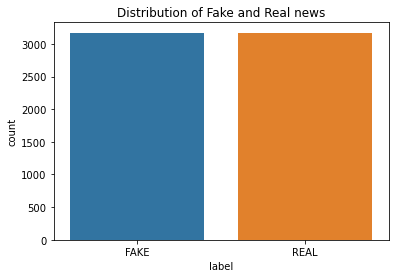

In [8]:
#graphic with the distribution of FAKE and REAl news
sns.countplot(x = labels, data = news_data)
plt.title("Distribution of Fake and Real news")
plt.show()

In [9]:
#count of the REAL and FAKE news
labels_count = news_data.drop_duplicates().groupby('label').count()
print(labels_count)

       Unnamed: 0  title  text
label                         
FAKE         3164   3164  3164
REAL         3171   3171  3171


In [10]:
#spliting the dataset to train and test sets
attributes_train,attributes_test,target_train,target_test=train_test_split(
    news_data['text'], 
    labels, 
    test_size=0.2, 
    random_state=7)

In [11]:
#initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(attributes_train) 
tfidf_test=tfidf_vectorizer.transform(attributes_test)

In [12]:
#initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,target_train)

#predict on the test set and calculate accuracy
target_pred=pac.predict(tfidf_test)
score=accuracy_score(target_test,target_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.58%


In [13]:
#build confusion matrix
confusion_matrix(target_test,target_pred, labels=['FAKE','REAL'])

array([[589,  49],
       [ 45, 584]], dtype=int64)